#   A great obstacle to happiness is to expect too much happiness.
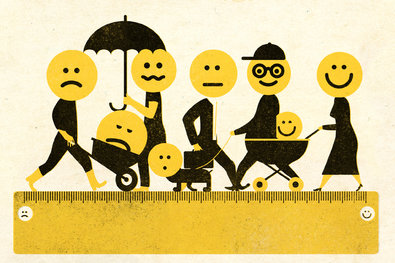
**World Happiness Report**
The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. The World Happiness Report 2020 for the first time ranks cities around the world by their subjective well-being and digs more deeply into how the social, urban and natural environments combine to affect our happiness.

Here I have divided this notebook in three parts:-
1. Visualization On 2015 Data
2. Combining the data of 2015,2016,2017,2018,2019 in one format by combining common columns
3. Finding the best model for prediction of Happiness of 2020 and do prediction


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Loading Librarys**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Import 2015 Data

In [ ]:
data_2015 = pd.read_csv("/kaggle/input/world-happiness-report/2015.csv", delimiter=',')
data_2015.head()

In [ ]:
data_2015.describe()

In [ ]:
data_2015.info()

# Visualization For Year 2015

HeatMap

In [ ]:
heatmap = sns.heatmap(
    data_2015.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

PairPlot

In [ ]:
sns.pairplot(data_2015)
plt.show()

Economy (GDP per Capita) Vs Happiness Score

In [ ]:
sns.jointplot("Economy (GDP per Capita)", "Happiness Score", data=data_2015,
                  kind="reg", truncate=False,
                  xlim=(0, 2), ylim=(0, 10),
                  color="m", height=7)

Health (Life Expectancy) Vs Happiness Score

In [ ]:
sns.jointplot("Health (Life Expectancy)", "Happiness Score", data=data_2015,
                  kind="reg", truncate=False,
                  xlim=(0, 2), ylim=(0, 10),
                  color="m", height=7)

Freedom Vs Happiness Score

In [ ]:
sns.jointplot("Freedom", "Happiness Score", data=data_2015,
                  kind="reg", truncate=False,
                  xlim=(0, 1), ylim=(0, 10),
                  color="m", height=7)

Trust (Government Corruption) Vs Happiness Score

In [ ]:
sns.jointplot("Trust (Government Corruption)", "Happiness Score", data=data_2015,
                  kind="reg", truncate=False,
                  xlim=(0, 1), ylim=(0, 10),
                  color="m", height=7)

Get Mean for Each Region

In [ ]:
avg_happiness = data_2015.groupby("Region").mean()
print(avg_happiness)

Happiness Score Of Each Region

In [ ]:
avg_happiness[["Happiness Score"]].plot.bar()

Health (Life Expectancy) Vs Happiness Score for each Region

In [ ]:
sns.lmplot(x="Health (Life Expectancy)", y="Happiness Score", col="Region", data=data_2015, col_wrap=4)

Economy (GDP per Capita) Vs Happiness Score for each Region

In [ ]:
sns.lmplot(x="Economy (GDP per Capita)", y="Happiness Score", col="Region", data=data_2015, col_wrap=4)

Family Vs Happiness Score for each Region

In [ ]:
sns.lmplot(x="Family", y="Happiness Score", col="Region", data=data_2015, col_wrap=4)

Freedom Vs Happiness Score for each Region

In [ ]:
sns.lmplot(x="Freedom", y="Happiness Score", col="Region", data=data_2015, col_wrap=4)

Trust (Government Corruption) Vs Happiness Score for each Region

In [ ]:
sns.lmplot(x="Trust (Government Corruption)", y="Happiness Score", col="Region", data=data_2015, col_wrap=4)

# Combining The Data
After going through each years data one can notice is that each year has some different columns while calculating happiness for each country. Thus I combined  all the years data having same column according to 2015. Following process is a bit lengthy. The column names I used are :-*'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity','Year'*.

*Note:- Some may have even better solution than this to combine the data. But I'm new to this field so I did it with the best way I can.Please give your suggestions if you have better solution 

In [ ]:
data_2015['Year'] = '2015'
data2015 = data_2015[['Country','Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)',
                      'Freedom','Trust (Government Corruption)','Generosity','Year']]
data2015.info()

In [ ]:
data_2016 = pd.read_csv("/kaggle/input/world-happiness-report/2016.csv", delimiter=',')
data_2016['Year'] = 2016
data2016 = data_2016[['Country','Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)',
                      'Freedom','Trust (Government Corruption)','Generosity','Year']]
data2016.info()

In [ ]:
data_2017 = pd.read_csv("/kaggle/input/world-happiness-report/2017.csv", delimiter=',')
data_2017.rename(columns={"Happiness.Score": "Happiness Score", "Economy..GDP.per.Capita.": "Economy (GDP per Capita)", 
                          "Health..Life.Expectancy.": "Health (Life Expectancy)","Trust..Government.Corruption.": "Trust (Government Corruption)"},
                    inplace = True)
data_2017['Year'] = 2017
data2017 = data_2017[['Country','Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)',
                      'Freedom','Trust (Government Corruption)','Generosity','Year']]
data2017.info()

In [ ]:
data_2018 = pd.read_csv("/kaggle/input/world-happiness-report/2018.csv", delimiter=',')
data_2018.rename(columns={"Country or region": "Country", "Score": "Happiness Score", "GDP per capita": "Economy (GDP per Capita)",
                         "Healthy life expectancy": "Health (Life Expectancy)","Freedom to make life choices": "Freedom",
                         "Perceptions of corruption": "Trust (Government Corruption)"}, inplace = True)
data_2018['Year'] = 2018
data2018 = data_2018[['Country','Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)',
                      'Freedom','Trust (Government Corruption)','Generosity','Year']]
data2018.info()

In 2018 we can see that *Trust (Government Corruption)* has one NULL value,
So we will find the value and fill it with the mean of previuos years Trust (Government Corruption) as replacing it with 0 is not a great solution

In [ ]:
is_NaN = data2018.isnull()
row_has_NaN = is_NaN. any(axis=1)
rows_with_NaN = data2018[row_has_NaN]
print(rows_with_NaN)

*United Arab Emirates* has the empty value.
We will get the values of *Trust (Government Corruption)* for *United Arab Emirates* from previos years i.e 2015,2016,2017

In [ ]:
corruption_15 = data2015.loc[data2015['Country'] == 'United Arab Emirates']
corruption_15 = corruption_15['Trust (Government Corruption)'].values.item()
corruption_15

In [ ]:
corruption_16 = data2016.loc[data2016['Country'] == 'United Arab Emirates']
corruption_16 = corruption_16['Trust (Government Corruption)'].values.item()
corruption_16

In [ ]:
corruption_17 = data2017.loc[data2017['Country'] == 'United Arab Emirates']
corruption_17 = corruption_17['Trust (Government Corruption)'].values.item()
corruption_17

In [ ]:
corruption_mean = np.mean([corruption_15,corruption_16,corruption_17])
corruption_mean

Now we will put the *corruption_mean* for country *United Arab Emirates*

In [ ]:
data2018.loc[data2018.Country == 'United Arab Emirates', 'Trust (Government Corruption)'] = corruption_mean
data2018.info()

Great now we will go further.

In [ ]:
data_2019 = pd.read_csv("/kaggle/input/world-happiness-report/2019.csv", delimiter=',')
data_2019['Year'] = 2019
data_2019.rename(columns={"Country or region": "Country","Score": "Happiness Score","GDP per capita": "Economy (GDP per Capita)",
                         "Healthy life expectancy": "Health (Life Expectancy)", "Freedom to make life choices": "Freedom",
                         "Perceptions of corruption": "Trust (Government Corruption)"}, inplace = True)
data2019 = data_2019[['Country','Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)',
                      'Freedom','Trust (Government Corruption)','Generosity','Year']]
data2019.info()

After changing each columns name we will combine the data of each year in one form

In [ ]:
merged_happiness  = pd.concat([data2015, data2016, data2017, data2018, data2019], ignore_index = True)
merged_happiness.head()

In [ ]:
merged_happiness.info()

In [ ]:
merged_happiness.describe()

**Scatter Plot for each year**

In [ ]:
sns.swarmplot(x="Year", y="Happiness Score",data=merged_happiness)

I have commented the below code beacause the hue is overlappint the image. Please un-comment if you want and adjust the hue

In [ ]:
#sns.swarmplot(x="Year", y="Happiness Score", hue="Country", data=merged_happiness)

**HeatMap**

In [ ]:
heatmap = sns.heatmap(
    merged_happiness.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Prediction
Now we will seperate the data in training and test sets.

In [ ]:
X = merged_happiness[['Economy (GDP per Capita)','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']]
y = merged_happiness[['Happiness Score']]
X.round(3)
y.round(3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

Here we will use three algo to predict the data 
1. LinearRegression
2. LinearSVR
3. RandomForestRegressor
Then using Mean Squared Error we will compare their outputs and find the best model.
At last we will load the 2020 data, transform the data and do the prediction.

# LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
linear_pred = lin_model.predict(X_test)
linear_error = mean_squared_error(y_test, linear_pred)

# LinearSVR

In [ ]:
from sklearn.svm import LinearSVR
svr_model = LinearSVR()
svr_model.fit(X_train, y_train.values.ravel())
svr_pred = svr_model.predict(X_test)
svr_error = mean_squared_error(y_test, svr_pred)

# RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rm_model = RandomForestRegressor(n_estimators=500, max_leaf_nodes=20, n_jobs=-1)
rm_model.fit(X_train, y_train.values.ravel())
rm_pred = rm_model.predict(X_test)
rm_error = mean_squared_error(y_test, rm_pred)

In [ ]:
print("The Mean Squared Error For Linear Regression is: {}".format(linear_error))

In [ ]:
print("The Mean Squared Error For Linear SVR is: {}".format(svr_error))

In [ ]:
print("The Mean Squared Error For RandomForestRegressor is: {}".format(rm_error))

As the *RandomForestRegressor* has the least *Mean Squared Error* we will choose that model

# Loading 2020 data

In [ ]:
data_2020 = pd.read_csv("/kaggle/input/world-happiness-report/2020.csv", delimiter=',')
data_2020.head()

Transforming the data.

In [ ]:
data_2020.drop(columns=['Generosity'] , inplace = True)
data_2020.head()

In [ ]:
data_2020.rename(columns={'Ladder score':'Happiness Score','Explained by: Log GDP per capita': 'Economy (GDP per Capita)',
                         'Explained by: Healthy life expectancy':'Health (Life Expectancy)',
                          'Explained by: Freedom to make life choices':'Freedom',
                         'Explained by: Perceptions of corruption':'Trust (Government Corruption)',
                          'Explained by: Generosity': 'Generosity'}, inplace=True)
data2020 = data_2020[['Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)',
                      'Freedom','Trust (Government Corruption)','Generosity']]
data2020.head()

Splitting the data.

In [ ]:
X2020 = data2020[['Economy (GDP per Capita)','Health (Life Expectancy)',
                      'Freedom','Trust (Government Corruption)','Generosity']]
y2020 = data2020['Happiness Score']

In [ ]:
X2020.head()

# Final Output

In [ ]:
pred2020 = rm_model.predict(X2020)

In [ ]:
maen_2020 = mean_squared_error(y2020, pred2020)

In [ ]:
print("The Mean Squared Error is: {}".format(maen_2020))

Plotting the predictions.

*I'm not sure wheather this plotting is correct or wrong so please suggest*

In [ ]:
plt.scatter(y2020, pred2020)
plt.plot([pred2020.min(), pred2020.max()], [pred2020.min(), pred2020.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('RandomForestRegressor')
plt.show()

Hence, we have done the prediction. 
Hope you liked the Notebook. If yes please like it. And give suggestion if any. ThankYou...!!!